In [1]:
%matplotlib inline
import nba_py as nba
from nba_py import player
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import math

In [6]:
plist = player.PlayerList(league_id='00', season='2016-17', only_current=1)
df = plist.info()
main_df = df[['PERSON_ID', 'DISPLAY_FIRST_LAST']]

In [52]:
CD_2ft_FGA = []
CD_4ft_FGA = []
CD_6ft_FGA = []
CD_open_FGA = []
CD_2ft_FG_PCT = []
CD_4ft_FG_PCT = []
CD_6ft_FG_PCT = []
CD_open_FG_PCT = []

CD_long_2ft_FGA = []
CD_long_4ft_FGA = []
CD_long_6ft_FGA = []
CD_long_open_FGA = []
CD_long_2ft_FG_PCT = []
CD_long_4ft_FG_PCT = []
CD_long_6ft_FG_PCT = []
CD_long_open_FG_PCT = []

Drib_0_FGA = []
Drib_1_FGA = []
Drib_2_FGA = []
Drib_3_FGA = []
Drib_7_FGA = []
Drib_0_FG_PCT = []
Drib_1_FG_PCT = []
Drib_2_FG_PCT = []
Drib_3_FG_PCT = []
Drib_7_FG_PCT = []

SC_24_FGA = []
SC_22_FGA = []
SC_18_FGA = []
SC_15_FGA = []
SC_7_FGA = []
SC_4_FGA = []
SC_0_FGA = []
SC_24_FG_PCT = []
SC_22_FG_PCT = []
SC_18_FG_PCT = []
SC_15_FG_PCT = []
SC_7_FG_PCT = []
SC_4_FG_PCT = []
SC_0_FG_PCT = []

TT_2_FGA = []
TT_6_FGA = []
TT_long_FGA = []
TT_2_FG_PCT = []
TT_6_FG_PCT = []
TT_long_FG_PCT = []

ST_CS_FGA = []
ST_PU_FGA = []
ST_LT10_FGA = []
ST_Other_FGA = []
ST_CS_FG_PCT = []
ST_PU_FG_PCT = []
ST_LT10_FG_PCT = []
ST_Other_FG_PCT = []

In [26]:
main_df.head()

,PERSON_ID,DISPLAY_FIRST_LAST,Q1_FGA,Q4_FGA,Q1_FG_PCT,Q4_FG_PCT,CD_2ft_FGA,CD_4ft_FGA,CD_6ft_FGA,CD_open_FGA,...,Drib_0_FGA,Drib_1_FGA,Drib_2_FGA,Drib_3_FGA,Drib_7_FGA,Drib_0_FG_PCT,Drib_1_FG_PCT,Drib_2_FG_PCT,Drib_3_FG_PCT,Drib_7_FG_PCT
0,203518,Alex Abrines,1.7,1.8,0.440,0.375,0.40,1.16,2.15,1.31,...,3.75,0.49,0.47,0.28,0.03,0.408,0.485,0.375,0.105,0.000
1,203112,Quincy Acy,1.8,1.5,0.395,0.479,0.05,0.13,0.16,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,203500,Steven Adams,3.2,1.1,0.569,0.556,2.63,4.10,1.10,0.34,...,6.00,1.00,0.48,0.68,0.01,0.606,0.475,0.500,0.463,1.000
3,201167,Arron Afflalo,2.4,1.4,0.441,0.379,0.77,2.79,2.43,0.85,...,3.33,1.13,0.85,1.30,0.23,0.453,0.507,0.346,0.430,0.357
4,201582,Alexis Ajinca,1.8,1.1,0.453,0.464,0.77,1.74,1.03,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
for p_id in tqdm.tqdm(main_df['PERSON_ID']):
    cur_player = player.PlayerShotTracking(p_id)
    if len(cur_player.touch_time_shooting()) >= 3:
        
        TT_2_FGA.append(cur_player.touch_time_shooting().ix[0]['FGA'])
        TT_6_FGA.append(cur_player.touch_time_shooting().ix[1]['FGA'])
        TT_long_FGA.append(cur_player.touch_time_shooting().ix[2]['FGA'])

        TT_2_FG_PCT.append(cur_player.touch_time_shooting().ix[0]['FG_PCT'])
        TT_6_FG_PCT.append(cur_player.touch_time_shooting().ix[1]['FG_PCT'])
        TT_long_FG_PCT.append(cur_player.touch_time_shooting().ix[2]['FG_PCT'])

    else:
        TT_2_FGA.append(None)
        TT_6_FGA.append(None)
        TT_long_FGA.append(None)

        TT_2_FG_PCT.append(None)
        TT_6_FG_PCT.append(None)
        TT_long_FG_PCT.append(None)


main_df['TT_2_FGA'] = TT_2_FGA
main_df['TT_6_FGA'] = TT_6_FGA
main_df['TT_long_FGA'] = TT_long_FGA

main_df['TT_2_FG_PCT'] = TT_2_FG_PCT
main_df['TT_6_FG_PCT'] = TT_6_FG_PCT
main_df['TT_long_FG_PCT'] = TT_long_FG_PCT


100%|██████████| 491/491 [00:58<00:00,  9.21it/s]


In [41]:
cur_player = player.PlayerShotTracking(203500)

In [42]:
cur_player.touch_time_shooting()

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,SORT_ORDER,GP,G,TOUCH_TIME_RANGE,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,203500,"Adams, Steven",1,80,79,Touch < 2 Seconds,0.732,3.66,5.98,0.613,0.613,0.730,3.66,5.96,0.614,0.002,0.0,0.01,0.0
1,203500,"Adams, Steven",2,80,70,Touch 2-6 Seconds,0.237,0.94,1.94,0.484,0.484,0.237,0.94,1.94,0.484,0.000,0.0,0.00,NaN
2,203500,"Adams, Steven",3,80,18,Touch 6+ Seconds,0.031,0.08,0.25,0.300,0.300,0.031,0.08,0.25,0.300,0.000,0.0,0.00,NaN


In [54]:
main_df.to_csv('main_df_offensive.csv')

In [55]:
main_df

,PERSON_ID,DISPLAY_FIRST_LAST,Q1_FGA,Q4_FGA,Q1_FG_PCT,Q4_FG_PCT,CD_2ft_FGA,CD_4ft_FGA,CD_6ft_FGA,CD_open_FGA,...,SC_15_FG_PCT,SC_7_FG_PCT,SC_4_FG_PCT,SC_0_FG_PCT,TT_2_FGA,TT_6_FGA,TT_long_FGA,TT_2_FG_PCT,TT_6_FG_PCT,TT_long_FG_PCT
0,203518,Alex Abrines,1.7,1.8,0.440,0.375,0.40,1.16,2.15,1.31,...,0.401,0.364,0.368,0.364,4.15,0.79,0.07,0.422,0.259,0.200
1,203112,Quincy Acy,1.8,1.5,0.395,0.479,0.05,0.13,0.16,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,203500,Steven Adams,3.2,1.1,0.569,0.556,2.63,4.10,1.10,0.34,...,0.591,0.510,0.333,0.300,5.98,1.94,0.25,0.613,0.484,0.300
3,201167,Arron Afflalo,2.4,1.4,0.441,0.379,0.77,2.79,2.43,0.85,...,0.510,0.375,0.360,0.000,4.02,2.41,0.41,0.449,0.435,0.400
4,201582,Alexis Ajinca,1.8,1.1,0.453,0.464,0.77,1.74,1.03,1.00,...,0.520,0.273,0.714,1.000,NaN,NaN,NaN,NaN,NaN,NaN
5,202332,Cole Aldrich,0.5,0.6,0.462,0.381,0.37,0.81,0.18,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,200746,LaMarcus Aldridge,4.6,3.2,0.465,0.454,2.39,4.76,3.82,3.59,...,0.448,0.496,0.369,0.778,8.72,5.30,0.55,0.520,0.415,0.410
7,202730,Lavoy Allen,1.1,0.6,0.491,0.516,0.58,0.90,0.60,0.72,...,0.430,0.333,0.294,0.600,2.62,0.17,0.02,0.484,0.100,0.000
8,2754,Tony Allen,2.3,1.7,0.454,0.475,3.00,3.34,1.08,0.96,...,0.401,0.500,0.325,0.750,5.58,2.11,0.69,0.475,0.440,0.408
9,202329,Al-Farouq Aminu,1.7,1.9,0.443,0.369,1.67,1.90,1.33,2.72,...,0.341,0.477,0.400,0.286,5.11,2.36,0.15,0.407,0.375,0.222


In [57]:
df = main_df.dropna()

In [59]:
df.mean()

PERSON_ID         481919.437908
Q1_FGA                 2.414706
Q4_FGA                 2.401634
Q1_FG_PCT              0.434493
Q4_FG_PCT              0.433562
CD_2ft_FGA             1.483105
CD_4ft_FGA             3.053268
CD_6ft_FGA             2.512614
CD_open_FGA            1.597288
CD_2ft_FG_PCT          0.434141
CD_4ft_FG_PCT          0.453683
CD_6ft_FG_PCT          0.429856
CD_open_FG_PCT         0.430425
Drib_0_FGA             3.811111
Drib_1_FGA             1.202778
Drib_2_FGA             1.007451
Drib_3_FGA             1.609641
Drib_7_FGA             1.016078
Drib_0_FG_PCT          0.447124
Drib_1_FG_PCT          0.434441
Drib_2_FG_PCT          0.425435
Drib_3_FG_PCT          0.402000
Drib_7_FG_PCT          0.411317
SC_24_FGA              0.392941
SC_22_FGA              1.208333
SC_18_FGA              1.419510
SC_15_FGA              3.897059
SC_7_FGA               0.863856
SC_4_FGA               0.599183
SC_0_FGA               0.201667
SC_24_FG_PCT           0.529131
SC_22_FG

In [60]:
df.median()

PERSON_ID         202907.0000
Q1_FGA                 2.1000
Q4_FGA                 2.1000
Q1_FG_PCT              0.4400
Q4_FG_PCT              0.4290
CD_2ft_FGA             1.1950
CD_4ft_FGA             2.6050
CD_6ft_FGA             2.1050
CD_open_FGA            1.4700
CD_2ft_FG_PCT          0.4430
CD_4ft_FG_PCT          0.4500
CD_6ft_FG_PCT          0.4235
CD_open_FG_PCT         0.4230
Drib_0_FGA             3.3900
Drib_1_FGA             0.9650
Drib_2_FGA             0.8400
Drib_3_FGA             1.1800
Drib_7_FGA             0.4200
Drib_0_FG_PCT          0.4430
Drib_1_FG_PCT          0.4415
Drib_2_FG_PCT          0.4285
Drib_3_FG_PCT          0.4135
Drib_7_FG_PCT          0.4185
SC_24_FGA              0.2900
SC_22_FGA              0.9850
SC_18_FGA              1.2000
SC_15_FGA              3.4400
SC_7_FGA               0.7600
SC_4_FGA               0.5300
SC_0_FGA               0.1600
SC_24_FG_PCT           0.5330
SC_22_FG_PCT           0.5000
SC_18_FG_PCT           0.4450
SC_15_FG_P

In [61]:
df.min()

PERSON_ID                     1713
DISPLAY_FIRST_LAST    Aaron Brooks
Q1_FGA                         0.2
Q4_FGA                         0.3
Q1_FG_PCT                        0
Q4_FG_PCT                    0.222
CD_2ft_FGA                    0.04
CD_4ft_FGA                    0.21
CD_6ft_FGA                    0.37
CD_open_FGA                   0.09
CD_2ft_FG_PCT                    0
CD_4ft_FG_PCT                    0
CD_6ft_FG_PCT                0.188
CD_open_FG_PCT               0.182
Drib_0_FGA                     0.4
Drib_1_FGA                     0.1
Drib_2_FGA                    0.11
Drib_3_FGA                    0.05
Drib_7_FGA                    0.01
Drib_0_FG_PCT                0.133
Drib_1_FG_PCT                0.071
Drib_2_FG_PCT                    0
Drib_3_FG_PCT                    0
Drib_7_FG_PCT                    0
SC_24_FGA                     0.01
SC_22_FGA                     0.03
SC_18_FGA                     0.21
SC_15_FGA                     0.39
SC_7_FGA            

In [63]:
df.max()

PERSON_ID                   1628021
DISPLAY_FIRST_LAST    Zach Randolph
Q1_FGA                          6.4
Q4_FGA                          7.3
Q1_FG_PCT                       0.8
Q4_FG_PCT                     0.636
CD_2ft_FGA                      5.2
CD_4ft_FGA                    10.89
CD_6ft_FGA                      7.7
CD_open_FGA                    4.58
CD_2ft_FG_PCT                  0.75
CD_4ft_FG_PCT                 0.661
CD_6ft_FG_PCT                 0.807
CD_open_FG_PCT                0.808
Drib_0_FGA                    11.77
Drib_1_FGA                     5.71
Drib_2_FGA                     3.95
Drib_3_FGA                      6.9
Drib_7_FGA                     8.14
Drib_0_FG_PCT                 0.706
Drib_1_FG_PCT                 0.833
Drib_2_FG_PCT                 0.778
Drib_3_FG_PCT                 0.667
Drib_7_FG_PCT                     1
SC_24_FGA                      2.53
SC_22_FGA                       5.1
SC_18_FGA                      5.09
SC_15_FGA                   

In [66]:
df.corr().to_csv('correlation_df.csv')

'PERSON_ID'

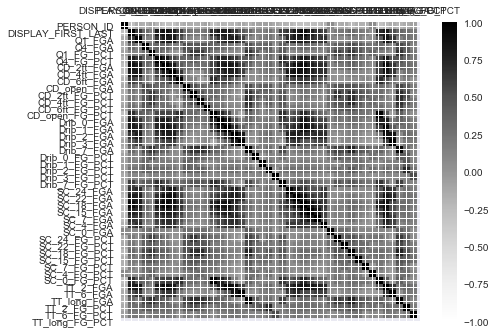

In [72]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,44,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()